# Test of the TMM tool by Sbyrnes

This Notebook aims to compare the tmm tool available at [https://github.com/sbyrnes321/tmm/tree/master](https://github.com/sbyrnes321/tmm/tree/master) with some known reults (Fersnel equation, half-wave-plate) and results obtained by [Pisano et all, 2018](https://doi.org/10.1117/12.2314127).

This Jupyter Notebook follows the tutorial https://github.com/sbyrnes321/tmm/blob/master/examples.ipynb.

First we import the libraries:

In [1]:
from __future__ import division, print_function, absolute_import
from tmm import (coh_tmm, unpolarized_RT, ellips,
                       position_resolved, find_in_structure_with_inf)

from numpy import pi, linspace, inf, array
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
degree = pi/180

We add some functions, that will be usedull later

In [2]:
def um_to_nm_orig(um_value):
    '''Converts um to fm'''
    return 1000*um_value


def decimal_to_decibels_orig(value):
    '''Converts relative signal strenght to dB'''
    if np.any(value <= 0):
        raise ValueError("Value must be greater than zero to calculate decibels.")
    return 10 * np.log10(value)

def ghz_to_nm(frequency_ghz):
    '''Converts frequency to wavelenght in vacuum in nm'''
    # Light speed
    c = 3e8  # m/s
    
    frequency_hz = frequency_ghz * 1e9  # Hz
    
    wavelength_m = c / frequency_hz
    
    wavelength_nm = wavelength_m * 1e9  # nm
    
    return wavelength_nm

um_to_nm=np.vectorize(um_to_nm_orig)
decimal_to_decibels=np.vectorize(decimal_to_decibels_orig)

First we show the example for the use of the function `coh_tmm`, which calculates results for coherent signal. In this case with s polarization.

<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Vid\AppData\Local\Temp\ipykernel_23140\3140514640.py:20: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), '
C:\Users\Vid\AppData\Local\Temp\ipykernel_23140\3140514640.py:21: SyntaxWarning: invalid escape sequence '\c'
  '45$^\circ$ (purple)');


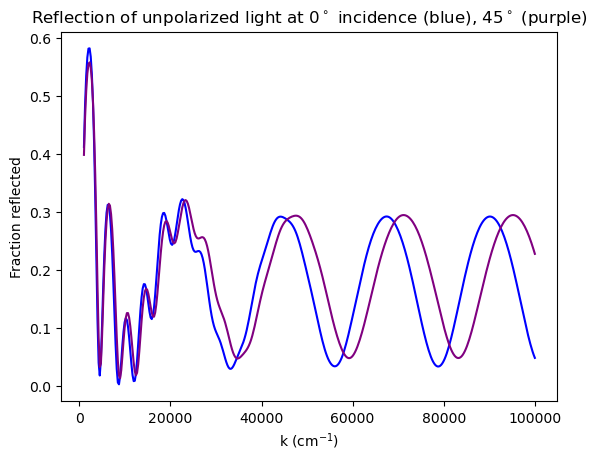

In [3]:
# list of layer thicknesses in nm
d_list = [inf,100,300,inf]
# list of refractive indices
n_list = [1,2.2,3.3+0.3j,1]
# list of wavenumbers to plot in nm^-1
ks=linspace(0.0001,.01,num=400)
# initialize lists of y-values to plot
Rnorm=[] 
R45=[]
for k in ks:
    # For normal incidence, s and p polarizations are identical.
    # I arbitrarily decided to use 's'.
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, 1/k)['R'])
    R45.append(unpolarized_RT(n_list, d_list, 45*degree, 1/k)['R'])
kcm = ks * 1e7 #ks in cm^-1 rather than nm^-1
plt.figure()
plt.plot(kcm,Rnorm,'blue',kcm,R45,'purple')
plt.xlabel('k (cm$^{-1}$)')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), '
            '45$^\circ$ (purple)');
plt.show()



In the next step I wanted to compate thet with a simple result obtained for the intersection between infinite air and glass slab. I followed https://en.wikipedia.org/wiki/Fresnel_equations, with the reflection for that case expressed as:
$$
R=\left(\frac{n_1-n_2}{n_1+n_2} \right)^2
$$

When we insert $n_1=1.0$ and $n_2=1.5$ we obtain the $R=0.04.

<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Vid\AppData\Local\Temp\ipykernel_23140\4108652889.py:18: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), '
C:\Users\Vid\AppData\Local\Temp\ipykernel_23140\4108652889.py:19: SyntaxWarning: invalid escape sequence '\c'
  '45$^\circ$ (purple)')


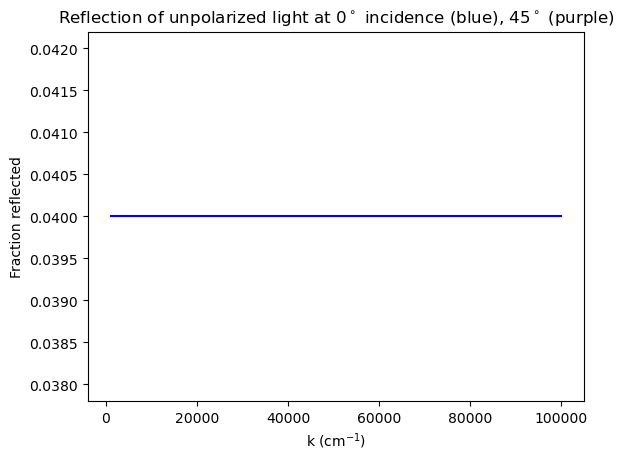

In [4]:
# list of layer thicknesses in nm
d_list = [inf,inf]
# list of refractive indices
n_list = [1.0,1.5]
# list of wavenumbers to plot in nm^-1
ks=linspace(0.0001,.01,num=400)
# initialize lists of y-values to plot
Rnorm=[] 
for k in ks:
    # For normal incidence, s and p polarizations are identical.
    # I arbitrarily decided to use 's'.
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, 1/k)['R'])
kcm = ks * 1e7 #ks in cm^-1 rather than nm^-1
plt.figure()
plt.plot(kcm,Rnorm,'blue')
plt.xlabel('k (cm$^{-1}$)')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), '
            '45$^\circ$ (purple)')
plt.show()


If we compare that with Fersnell equation (https://en.wikipedia.org/wiki/Fresnel_equations), we see, that the results agree.

We can do the same for incidence angle of 45°:

<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Vid\AppData\Local\Temp\ipykernel_23140\2378989718.py:18: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), '
C:\Users\Vid\AppData\Local\Temp\ipykernel_23140\2378989718.py:19: SyntaxWarning: invalid escape sequence '\c'
  '45$^\circ$ (purple)');


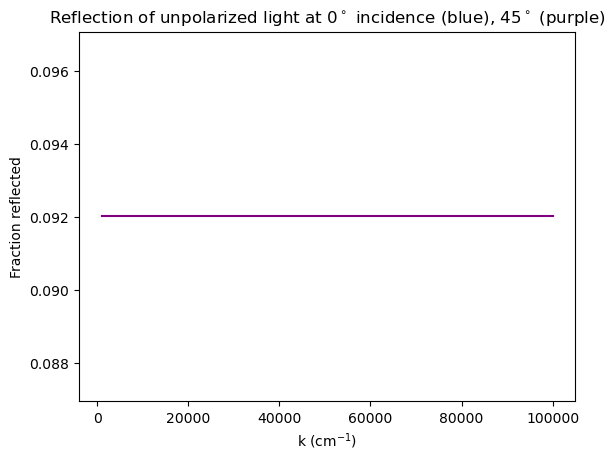

In [5]:
# list of layer thicknesses in nm
d_list = [inf,inf]
# list of refractive indices
n_list = [1.0,1.5]
# list of wavenumbers to plot in nm^-1
ks=linspace(0.0001,.01,num=400)
# initialize lists of y-values to plot
R45=[]
for k in ks:
    # For normal incidence, s and p polarizations are identical.
    # I arbitrarily decided to use 's'.
    R45.append(coh_tmm('s',n_list, d_list, 45*degree, 1/k)['R'])
kcm = ks * 1e7 #ks in cm^-1 rather than nm^-1
plt.figure()
plt.plot(kcm,R45,'purple')
plt.xlabel('k (cm$^{-1}$)')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue), '
            '45$^\circ$ (purple)');
plt.show()

We can compare this with:
$$
r_s = \left( \frac{n_1 \cos \theta_i - n_2 \cos \theta_t}{n_1 \cos \theta_i + n_2 \cos \theta_t} \right)^2
$$
Where the $\theta_i$ is the angle of incidence and $\theta_t$ the angle of refraction. The full formula in terms of only $\theta_i$ is available on wikipedia for the n=1.5 it gives the 0.092 as result, which is the same as obtained.

In the next step we observe reflection on the $\lambda / 2$ glas plate for 200 GHz with $\lambda=$1.5mm. We need to use thickness defined as:
$$
d=\frac{\lambda}{4n}
$$


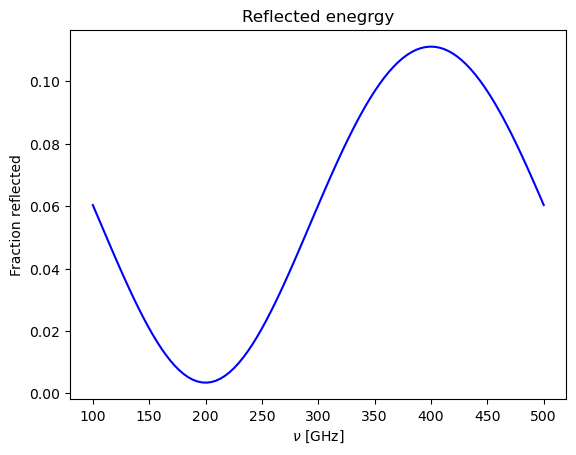

In [6]:
# list of layer thicknesses in nm
d_list = [inf,250000.0,inf]
# list of refractive indices
n_list = [1.0,1.5,2.0]

# List of frequencies
frequencies=linspace(100,500,num=100)

Rnorm=[] 
for freq in frequencies:
    # For normal incidence, s and p polarizations are identical.
    # I arbitrarily decided to use 's'.
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, ghz_to_nm(freq))['R'])

plt.figure()
plt.plot(frequencies,Rnorm,'blue')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel('Fraction reflected')
plt.title('Reflected enegrgy');
plt.show()


We see the minimum of reflection at 200 GHz, which is expected. Lets do double anti-reflection coating:

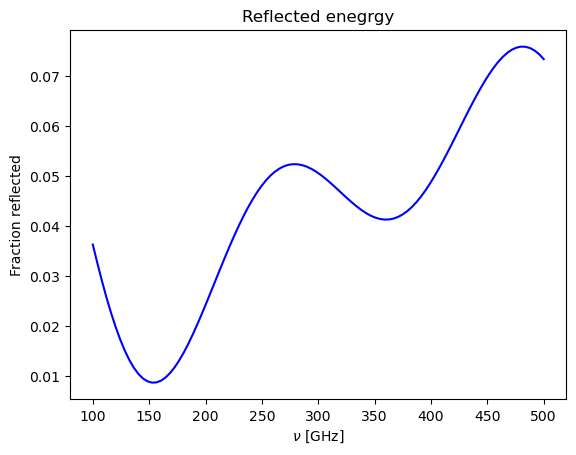

In [7]:
# list of layer thicknesses in nm
d_list = [inf,250000.0,125000,inf]
# list of refractive indices
n_list = [1.0,1.5,1.75,2.0]

# List of frequencies
frequencies=linspace(100,500,num=100)

Rnorm=[] 
for freq in frequencies:
    # For normal incidence, s and p polarizations are identical.
    # I arbitrarily decided to use 's'.
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, ghz_to_nm(freq))['R'])

plt.figure()
plt.plot(frequencies,Rnorm,'blue')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel('Fraction reflected')
plt.title('Reflected enegrgy');
plt.show()


We can clearly observe 2 dips, which is somewhat expected.

In the next step we observe the results compared to the ones obtained by [Pisano et all, 2018](https://doi.org/10.1117/12.2314127). The paper demonstrates 4 different examples made from 1, 2, 3 and 5 layers with different $n$. The transmission is ewvaluated and plotted in the paper. I will use TMM package, to reconstruct plots. The proposed ARCs are based on the layers of plastinc materials with customized $n$ glued together. Paper presents 4 different theoretical designs together with the results, which will be used as a reference for TMM package tested here. The results from the paper are shown in the figure, but they are not shown here to avoid potential problems with the copyrights.


First we will define a list of frequencies, analyzed here:

In [8]:
# List of frequencies
frequencies=linspace(20,720,num=500)

Now we will analyse a single slab of material with $n=1.48$ and air on booth sides.

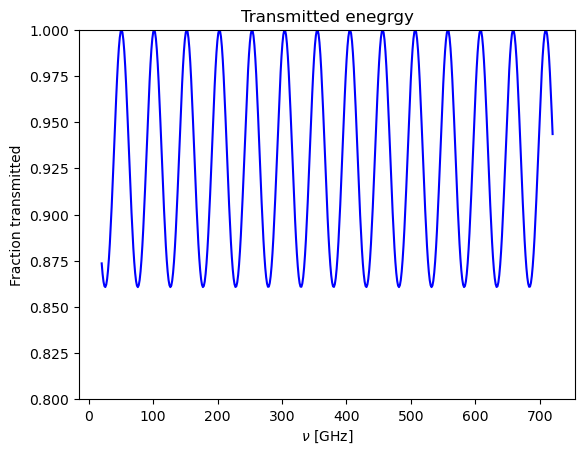

In [9]:
# list of layer thicknesses in nm
d_list = [inf,um_to_nm(2000),inf]
# list of refractive indices
n_list = [1.0,1.48,1.0]


Rnorm=[] 
for freq in frequencies:
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, ghz_to_nm(freq))['T'])

plt.figure()
plt.plot(frequencies,Rnorm,'blue')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel('Fraction transmitted')
plt.title('Transmitted enegrgy')
plt.ylim(0.8, 1.0)
plt.show()


We can see, that the result looks the same as results from the paper. In the next step we look at the system with 2 layers:

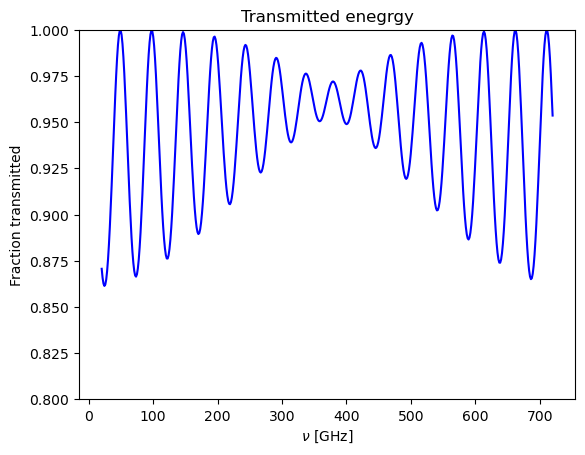

In [10]:
# list of layer thicknesses in nm
d_list = [inf, um_to_nm(160), um_to_nm(2000),inf]
# list of refractive indices
n_list = [1.0,1.25,1.48,1.0]


Rnorm=[] 
for freq in frequencies:
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, ghz_to_nm(freq))['T'])

plt.figure()
plt.plot(frequencies,Rnorm,'blue')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel('Fraction transmitted')
plt.title('Transmitted enegrgy')
plt.ylim(0.8, 1.0)
plt.show()

Even in this case the result is as expected. We can continue to look at 3 and 5 layer examples:

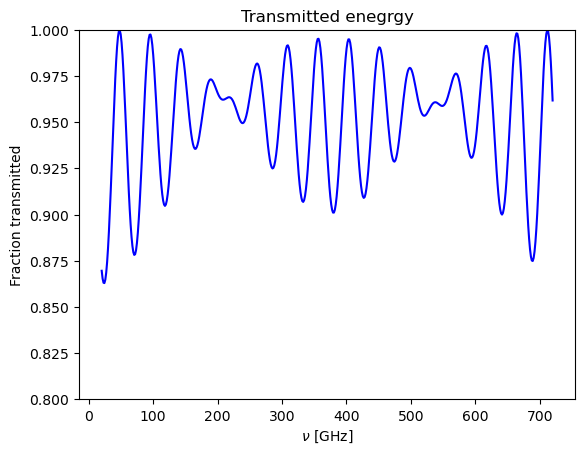

In [11]:
# list of layer thicknesses in nm
d_list = [inf, um_to_nm(170), um_to_nm(160), um_to_nm(2000),inf]
# list of refractive indices
n_list = [1.0,1.17,1.25,1.48,1.0]


Rnorm=[] 
for freq in frequencies:
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, ghz_to_nm(freq))['T'])

plt.figure()
plt.plot(frequencies,Rnorm,'blue')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel('Fraction transmitted')
plt.title('Transmitted enegrgy')
plt.ylim(0.8, 1.0)
plt.show()

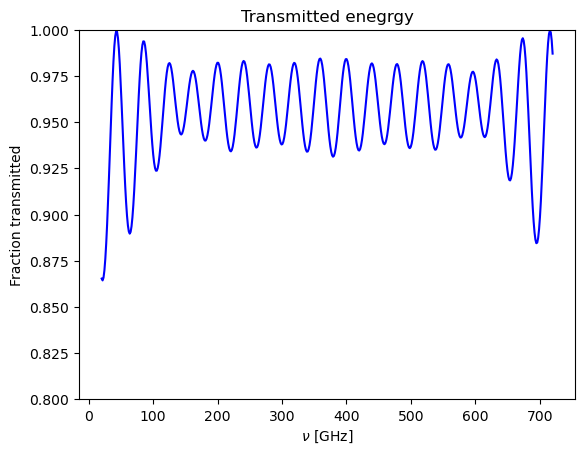

In [12]:
# list of layer thicknesses in nm
d_list = [inf, um_to_nm(170), um_to_nm(160), um_to_nm(148), um_to_nm(139), um_to_nm(2000),inf]
# list of refractive indices
n_list = [1.0,1.17,1.25,1.35,1.43,1.48,1.0]


Rnorm=[] 
for freq in frequencies:
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, ghz_to_nm(freq))['T'])

plt.figure()
plt.plot(frequencies,Rnorm,'blue')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel('Fraction transmitted')
plt.title('Transmitted enegrgy')
plt.ylim(0.8, 1.0)
plt.show()

Even in this case my results and results by Pisano et all, 2018 agree.  In the last step we can model the reflection of the ARC actually produced by authors. Their simulation of proposed solution is shown in the paper. It is not shown here, to avoid potential promlems with the copyrights.

Their optical element with ARC of booth sides consists of 13 layers of 3 different materials (3 different values of $n$), glued together with the glue with $n=1.52$.

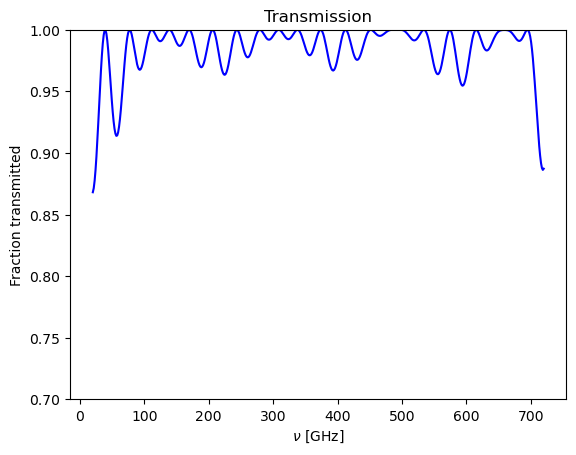

In [13]:
# list of layer thicknesses in nm
d_list = [inf,
          um_to_nm(170), um_to_nm(6),
          um_to_nm(178), um_to_nm(6),
          um_to_nm(12), um_to_nm(6),
          um_to_nm(80), um_to_nm(6),
          um_to_nm(40), um_to_nm(6),
          um_to_nm(54), um_to_nm(6),
          um_to_nm(2000), um_to_nm(6),
          um_to_nm(54), um_to_nm(6),
          um_to_nm(40), um_to_nm(6),
          um_to_nm(80), um_to_nm(6),
          um_to_nm(12), um_to_nm(6),
          um_to_nm(178), um_to_nm(6),
          um_to_nm(170),
          inf         ]
# list of refractive indices
n_list = [1.0,
          1.17,1.52,
          1.25,1.52,
          1.48,1.52,
          1.25,1.52,
          1.48,1.52,
          1.25,1.52,
          1.48,1.52,
          1.25,1.52,
          1.48,1.52,
          1.25,1.52,
          1.48,1.52,
          1.25,1.48,
          1.17,          
          1.0]


Rnorm=[] 
for freq in frequencies:
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, ghz_to_nm(freq))['T'])

plt.figure()
plt.plot(frequencies,Rnorm,'blue')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel('Fraction transmitted')
plt.title('Transmission')
plt.ylim(0.7, 1)
plt.show()

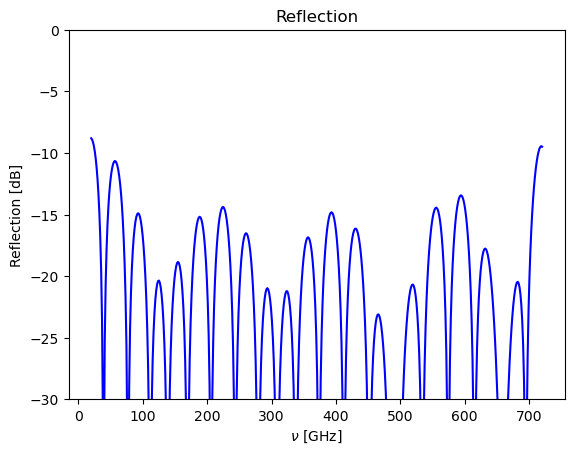

In [14]:
# list of layer thicknesses in nm
d_list = [inf,
          um_to_nm(170), um_to_nm(6),
          um_to_nm(178), um_to_nm(6),
          um_to_nm(12), um_to_nm(6),
          um_to_nm(80), um_to_nm(6),
          um_to_nm(40), um_to_nm(6),
          um_to_nm(54), um_to_nm(6),
          um_to_nm(2000), um_to_nm(6),
          um_to_nm(54), um_to_nm(6),
          um_to_nm(40), um_to_nm(6),
          um_to_nm(80), um_to_nm(6),
          um_to_nm(12), um_to_nm(6),
          um_to_nm(178), um_to_nm(6),
          um_to_nm(170),
          inf         ]
# list of refractive indices
n_list = [1.0,
          1.17,1.52,
          1.25,1.52,
          1.48,1.52,
          1.25,1.52,
          1.48,1.52,
          1.25,1.52,
          1.48,1.52,
          1.25,1.52,
          1.48,1.52,
          1.25,1.52,
          1.48,1.52,
          1.25,1.48,
          1.17,          
          1.0]


Rnorm=[] 
for freq in frequencies:
    Rnorm.append(coh_tmm('s',n_list, d_list, 0, ghz_to_nm(freq))['R'])

plt.figure()
plt.plot(frequencies,decimal_to_decibels(Rnorm),'blue')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel('Reflection [dB]')
plt.title('Reflection')
plt.ylim(-30, 0)
plt.show()

If we compare that with the figure from the Pisano et al, 2018, we can see that booth the Reflection and Transmission agree.

References:


Pisano, Giampaolo, Ng, Richard, Zhu, Cheng, Tucker, Carole, Ade, Peter.  
"Multi-octave anti-reflection coating for polypropylene-based quasi-optical devices."  
*Proc. SPIE 10708, Millimeter, Submillimeter, and Far-Infrared Detectors and Instrumentation for Astronomy IX,* 107084A (9 July 2018).  
DOI: [10.1117/12.2314127](https://doi.org/10.1117/12.2314127)
